# [SpacePlace] Summer 2020
## Market Insights for Product Launch, analysis by Ellis Cho
### Table of Contents
1. [Downloading and Cleaning the Data](#section1)


2. [Exploratory Data Analysis and Market Sizing](#section2)
    
    2.1 [A Closer Look at Five Top States](#section2.1)
    
    2.2 [Distinguishing Positive and Negative Market Growth](#section2.2)


3. [Statistical Analysis: Wilcoxon Signed-Rank Test](#section3)


4. [Market Segmentation](#section4)
    
    4.1 [Considering `YoY % Change`](#section4.1)
    
    4.2 [Considering `YoY Raw Growth Volume`](#section4.2)
    
    4.3 [Ten Target Markets for SpacePlace Product Launch](#section4.3)

<a id='section1'></a>
# Downloading and Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import scipy.stats as st
import pylab as py 
from textwrap import wrap
%matplotlib inline

In [2]:
# Dataset made public by AirDNA
YoY = pd.read_csv("YoY_AirDNA.csv")

YoY = YoY.reset_index().iloc[1:len(YoY)].rename(columns={
    "Top Cities by 2020 Reservations (YoY Comparison )":"City", 
    "Unnamed: 1":"State", 
    "Unnamed: 2":"2019", 
    "Unnamed: 3":"2020", 
    "Unnamed: 5":"YoY % Change"}).drop(["index", "Unnamed: 4"], axis=1)

YoY["YoY % Change"] = YoY["YoY % Change"].astype(float)

# Clean out NaN values (1 row)
YoY = YoY.dropna()

YoY["YoY Raw Growth Volume"] = YoY["2020"] - YoY["2019"]
YoY = YoY[["City", "State", "2019", "2020", "YoY Raw Growth Volume", "YoY % Change"]]

YoY.head()

,City,State,2019,2020,YoY Raw Growth Volume,YoY % Change
1,Shaver Lake,California,564,1000.0,436.0,0.773050
2,Holly Ridge,North Carolina,521,1003.0,482.0,0.925144
3,Pasadena,California,1292,1003.0,-289.0,-0.223684
4,Fairbanks,Alaska,1014,1010.0,-4.0,-0.003945
5,Grand Rapids,Michigan,1269,1011.0,-258.0,-0.203310


<a id='section2'></a>
# Exploratory Data Analysis and Market Sizing
**Questions:** Which states have the most Airbnb market locations? Which states receive the most Airbnb bookings? How do these metrics compare between 2019 and 2020?

In [3]:
YoY["State"].value_counts().head(10)

California        70
Florida           62
North Carolina    31
Colorado          30
Texas             27
South Carolina    15
Arizona           15
Georgia           15
Oregon            14
Puerto Rico       13
Name: State, dtype: int64

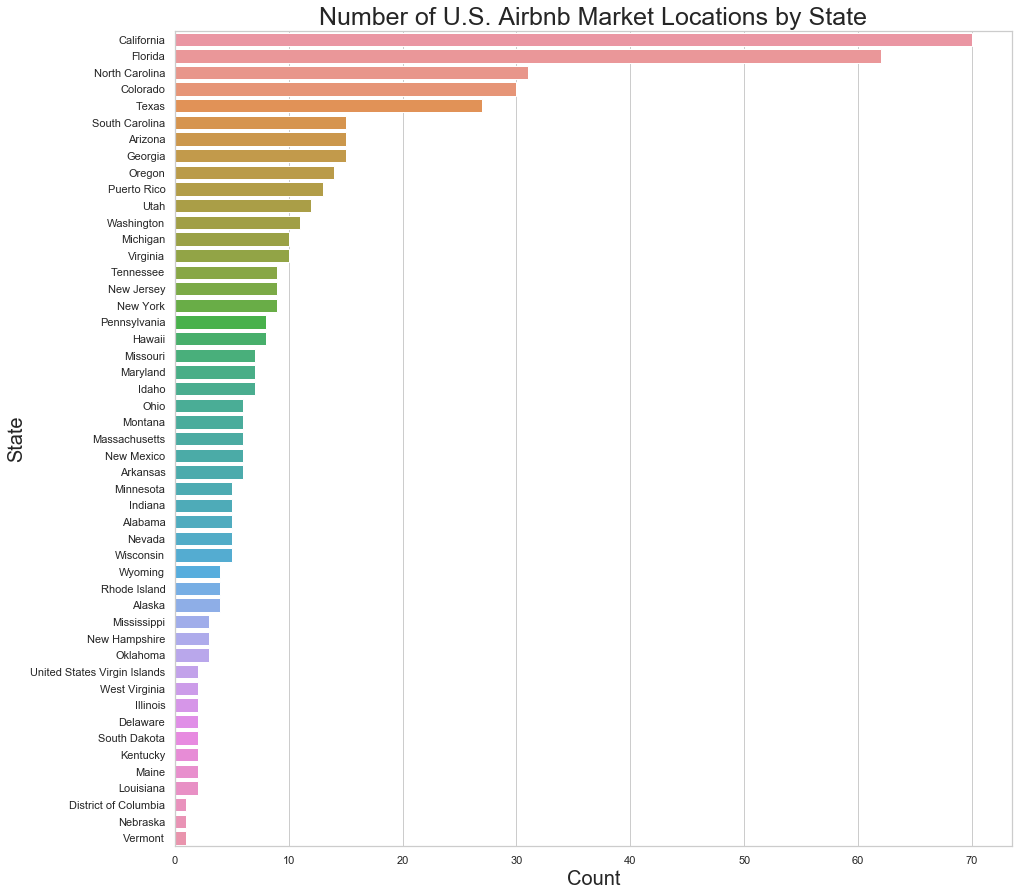

In [4]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

count_by_states = sns.countplot(data=YoY, y="State", order=YoY["State"].value_counts(ascending=False).index)
count_by_states.set_ylabel("State", fontsize=20)
count_by_states.set_xlabel("Count", fontsize=20)
count_by_states.set_title("Number of U.S. Airbnb Market Locations by State", fontsize=25);

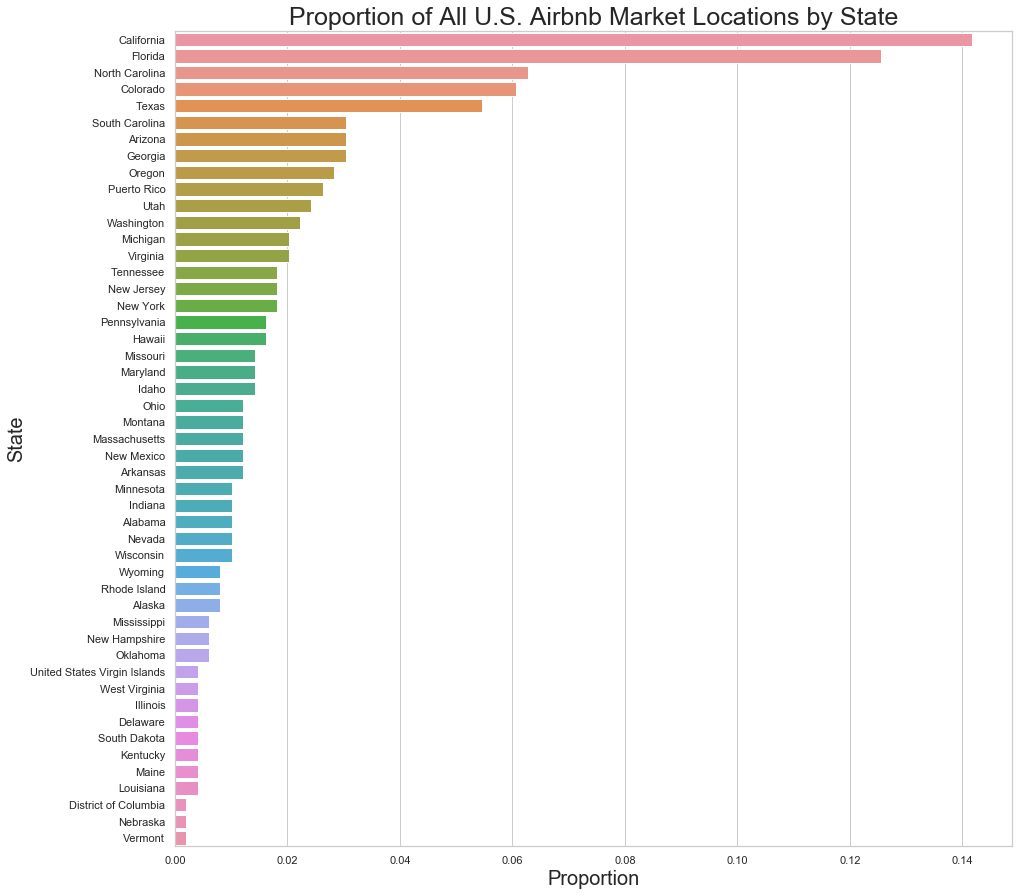

In [5]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

state_props = (YoY["State"].value_counts()/len(YoY)).to_frame().reset_index()
state_props = state_props.rename(columns={"index":"State", "State":"Proportion"})

props_by_state = sns.barplot(data=state_props, x="Proportion", y="State")
props_by_state.set_ylabel("State", fontsize=20)
props_by_state.set_xlabel("Proportion", fontsize=20)
props_by_state.set_title("Proportion of All U.S. Airbnb Market Locations by State", fontsize=25);

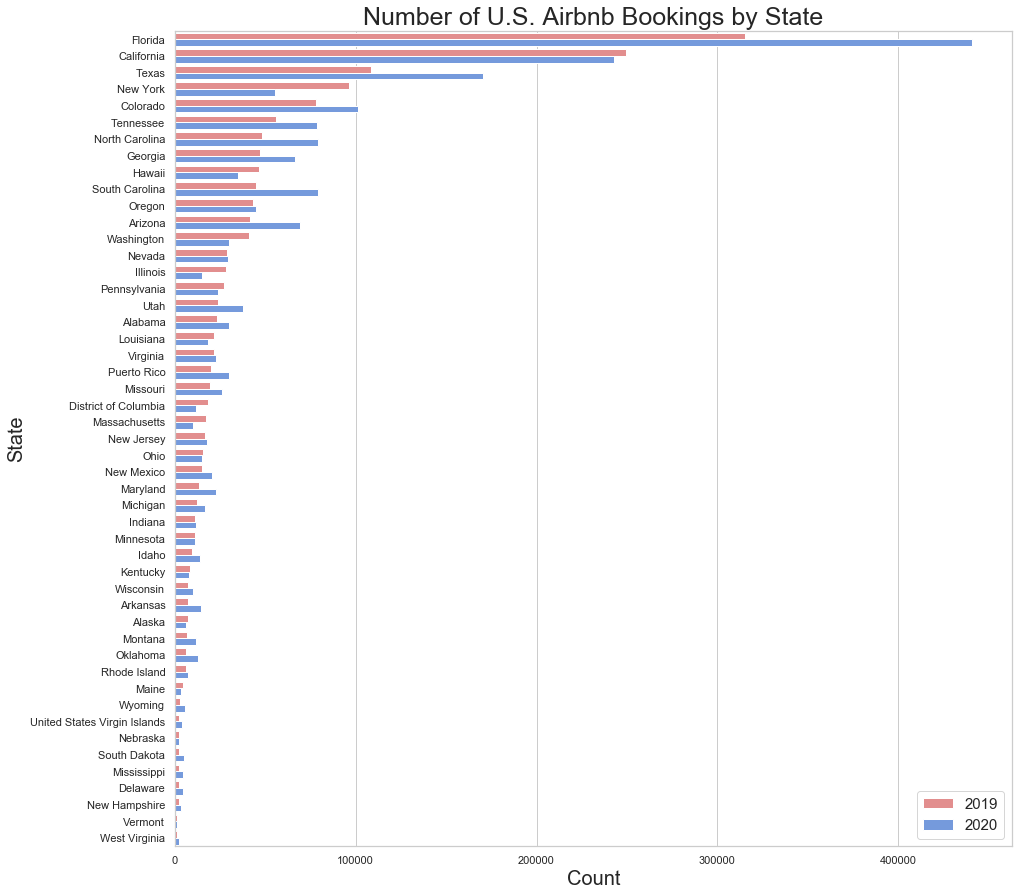

In [6]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

Sums_byState = YoY.groupby("State").sum().reset_index().drop(["YoY Raw Growth Volume", "YoY % Change"], axis=1).sort_values("2019", ascending=False)
Sums_byState = pd.melt(Sums_byState, id_vars="State", var_name="Year", value_name="Number of Bookings")
sns.barplot(data=Sums_byState, x="Number of Bookings", y="State", hue="Year", palette=["lightcoral", "cornflowerblue"])

plt.xlabel("Count", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("Number of U.S. Airbnb Bookings by State", fontsize=25)
plt.legend(fontsize=15);

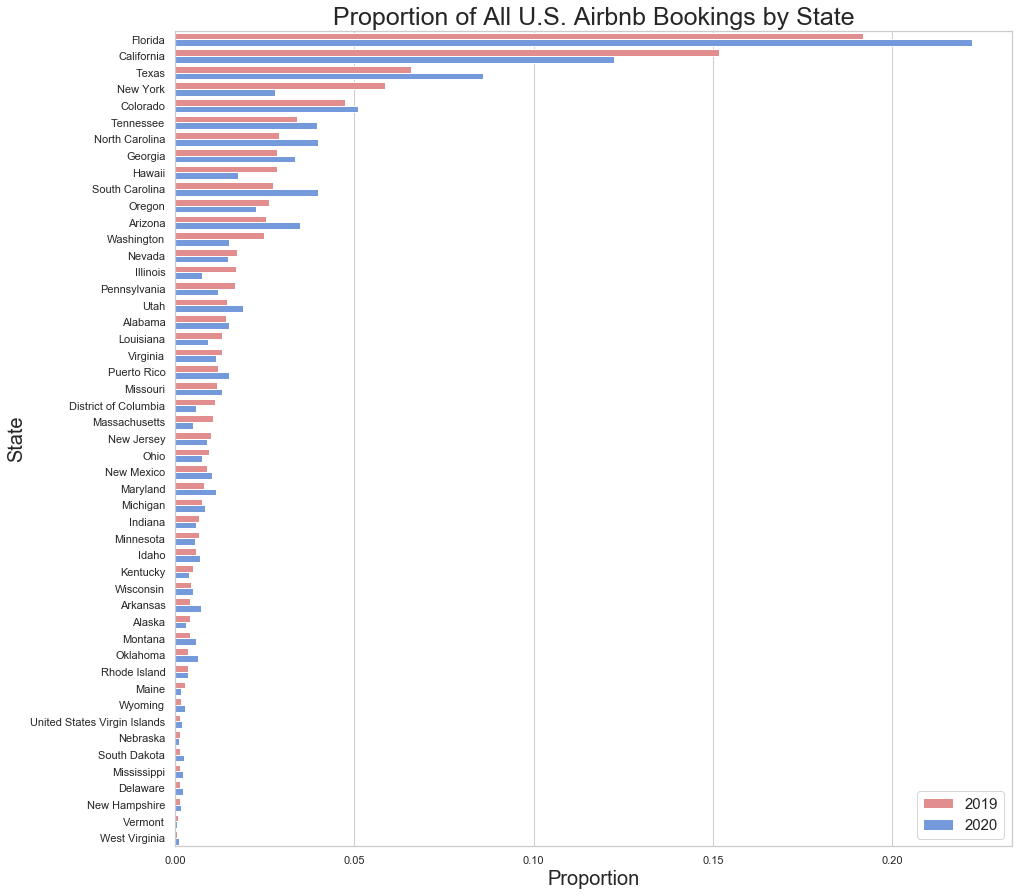

In [7]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid") 

Props_byState = YoY.groupby("State").sum().reset_index().drop(["YoY Raw Growth Volume", "YoY % Change"], axis=1)
Props_byState["2019"] = Props_byState["2019"]/sum(Props_byState["2019"])
Props_byState["2020"] = Props_byState["2020"]/sum(Props_byState["2020"])
Props_byState = Props_byState.sort_values(by="2019", ascending=False)
Props_byState = pd.melt(Props_byState, id_vars="State", var_name="Year", value_name="Proportion of Bookings")

sns.barplot(data=Props_byState, x="Proportion of Bookings", y="State", hue="Year", palette=["lightcoral", "cornflowerblue"])

plt.xlabel("Proportion", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("Proportion of All U.S. Airbnb Bookings by State", fontsize=25)
plt.legend(fontsize=15);

<a id='section2.1'></a>
## A Closer Look at Five Top States
**Florida, California, Texas, New York, and Colorado** appear to be the five front-runner states in terms of the number of Airbnb bookings they receive; that is, let's say that they are the five **most popular** states for Airbnb vacation rentals and travel destinations. 

Let's take a closer look at these five states:

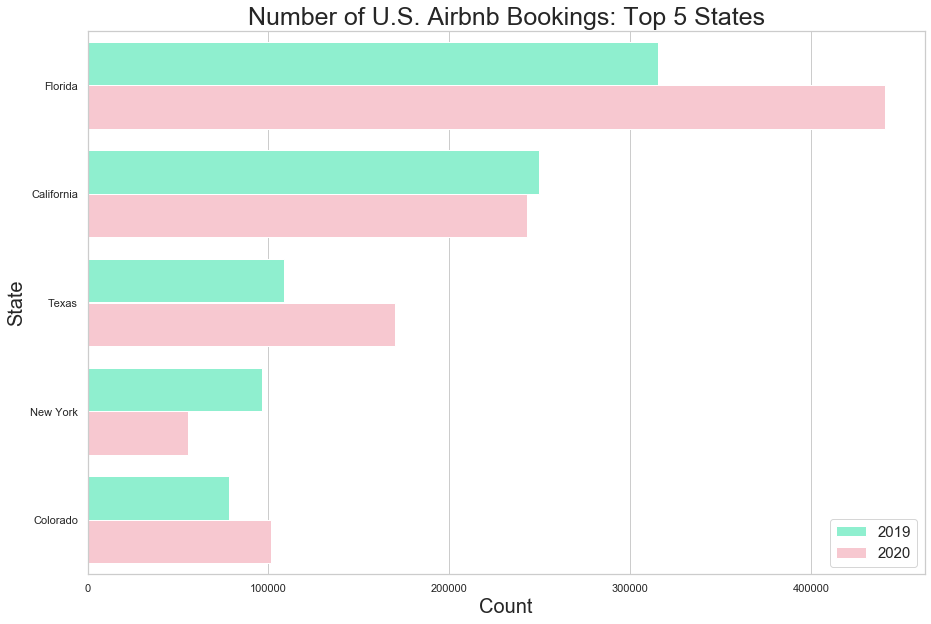

In [8]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

Sums_byState = YoY.groupby("State").sum().reset_index().drop(["YoY Raw Growth Volume", "YoY % Change"], axis=1).sort_values(by="2019", ascending=False)
Sums_byState = pd.melt(Sums_byState, id_vars="State", var_name="Year", value_name="Number of Bookings")
Sums_FiveStates = Sums_byState.set_index("State").loc[["Florida","California","Texas","New York","Colorado"]].reset_index()

sns.barplot(data=Sums_FiveStates, x="Number of Bookings", y="State", hue="Year", palette=["aquamarine", "pink"])

plt.xlabel("Count", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("Number of U.S. Airbnb Bookings: Top 5 States", fontsize=25)
plt.legend(fontsize=15);

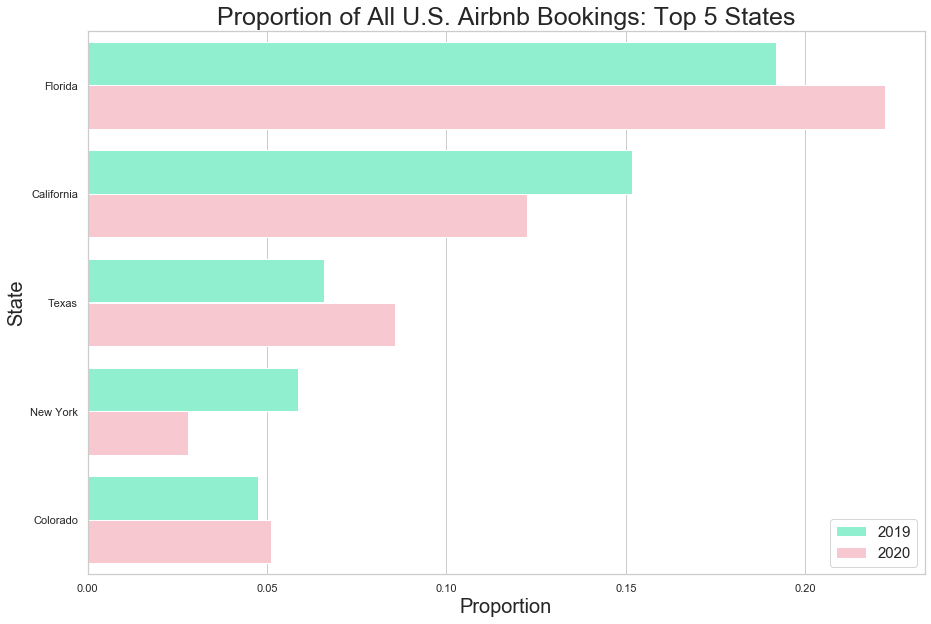

In [9]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

Props_byState = YoY.groupby("State").sum().reset_index().drop(["YoY Raw Growth Volume", "YoY % Change"], axis=1)
Props_byState["2019"] = Props_byState["2019"]/sum(Props_byState["2019"])
Props_byState["2020"] = Props_byState["2020"]/sum(Props_byState["2020"])
Props_byState = Props_byState.sort_values(by="2019", ascending=False)
Props_byState = pd.melt(Props_byState, id_vars="State", var_name="Year", value_name="Proportion of Bookings")
Props_FiveStates = Props_byState.set_index("State").loc[["Florida","California","Texas","New York","Colorado"]].reset_index()

sns.barplot(data=Props_FiveStates, x="Proportion of Bookings", y="State", hue="Year", palette=["aquamarine", "pink"])

plt.xlabel("Proportion", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("Proportion of All U.S. Airbnb Bookings: Top 5 States", fontsize=25)
plt.legend(fontsize=15);

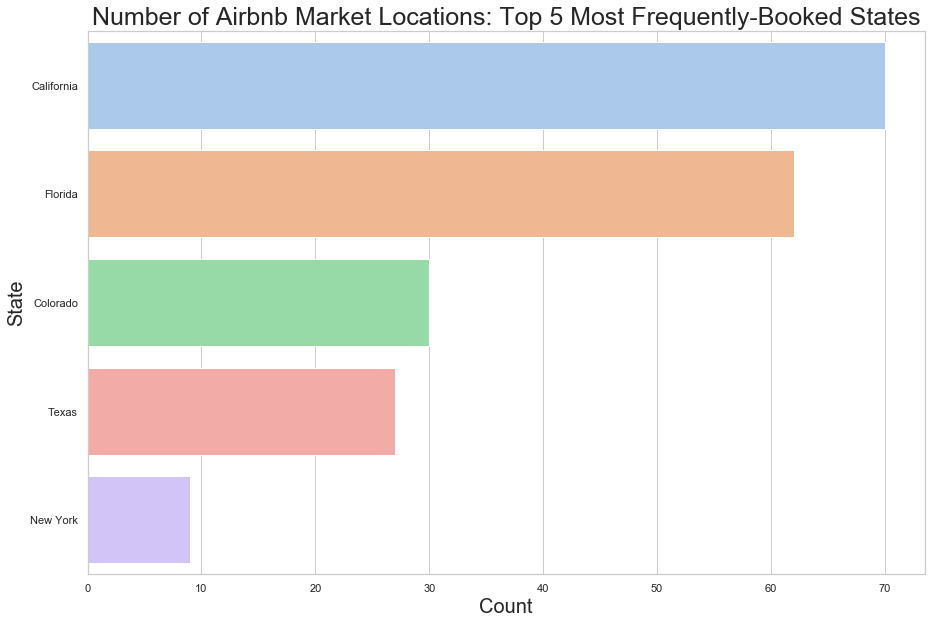

In [10]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

sns.countplot(data=YoY.set_index("State").loc[["California", "Florida", "Colorado", "Texas", "New York"]].reset_index(),
              y="State", palette="pastel");

plt.xlabel("Count", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("\n".join(wrap("Number of Airbnb Market Locations: Top 5 Most Frequently-Booked States")), 
               fontsize=25);

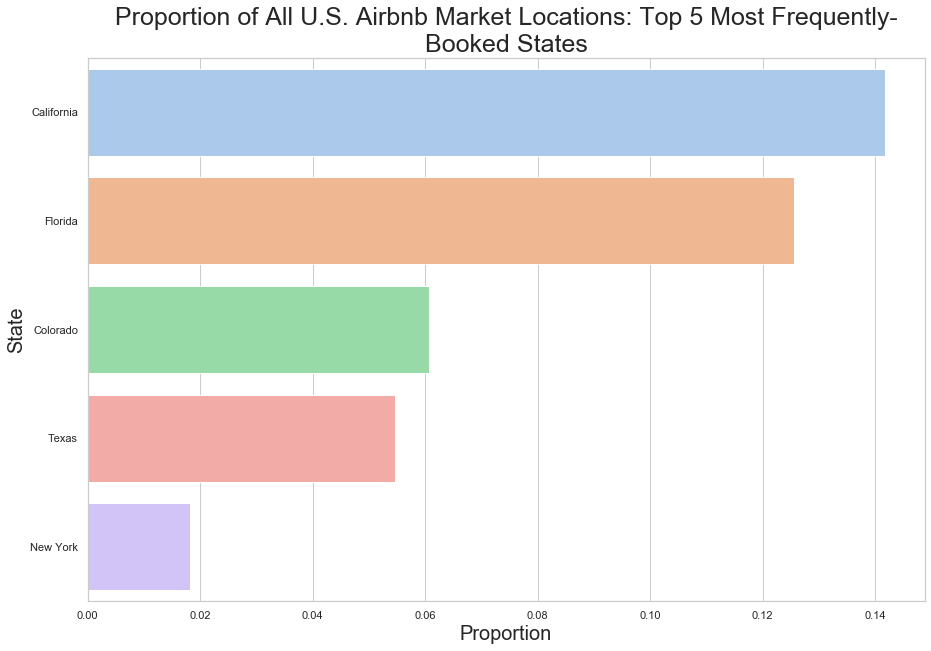

In [13]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

sns.barplot(data=state_props.set_index("State").loc[["California", "Florida", "Colorado", "Texas", "New York"]].reset_index(),
            x="Proportion", y="State", palette="pastel");

plt.xlabel("Proportion", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("\n".join(wrap("Proportion of All U.S. Airbnb Market Locations: Top 5 Most Frequently-Booked States")), 
               fontsize=25);

<a id='section2.2'></a>
## Distinguishing Positive and Negative Market Growth
**Questions:** Which states and locations experienced positive YoY growth from 2019 to 2020? Which states and locations experienced negative YoY growth from 2019 to 2020?

In [14]:
Grouped_YoY = YoY.groupby(["State", "City"]).apply(sum).drop(["City", "State"], axis=1)
Grouped_YoY.head(10)

2019     2020  YoY Raw Growth Volume  YoY % Change
State   City                                                               
Alabama Birmingham       1409   1449.0                   40.0      0.028389
        Dauphin Island    663   1307.0                  644.0      0.971342
        Gulf Shores     10003  15570.0                 5567.0      0.556533
        Mobile            846   1099.0                  253.0      0.299054
        Orange Beach    10378  10620.0                  242.0      0.023319
Alaska  Anchorage        3638   2441.0                -1197.0     -0.329027
        Fairbanks        1014   1010.0                   -4.0     -0.003945
        Homer            1192   1382.0                  190.0      0.159396
        Seward           1267   1489.0                  222.0      0.175217
Arizona Chandler          608   1014.0                  406.0      0.667763

In [15]:
# Double-check if the dataframe contains any NaN values
Grouped_YoY.isnull().values.any() 

False

In [16]:
# Markets that achieved positive YoY growth
Pos_Growth = Grouped_YoY.loc[Grouped_YoY["YoY Raw Growth Volume"]>0] 

# Markets that achieved negative YoY growth
Neg_Growth = Grouped_YoY.loc[Grouped_YoY["YoY Raw Growth Volume"]<0] 

402 out of 494, or **81.38%** of U.S. Airbnb Markets achieved positive year-on-year growth in the number of bookings from 2019 to 2020:

In [17]:
len(Pos_Growth), len(Grouped_YoY), round((len(Pos_Growth)/len(Grouped_YoY))*100,2)

(402, 494, 81.38)

92 out of 494, or **18.62%** of U.S. Airbnb Markets achieved negative year-on-year growth in the number of bookings from 2019 to 2020:

In [18]:
len(Neg_Growth), len(Grouped_YoY), round((len(Neg_Growth)/len(Grouped_YoY))*100,2)

(92, 494, 18.62)

There are **1,984,206** Airbnb bookings so far in 2020, and there were **1,644,091** Airbnb bookings from this same time in 2019:

In [19]:
sum(YoY["2020"]), sum(YoY["2019"])

(1984206.0, 1644091)

There are approximately **20.69%** more Airbnb bookings so far in 2020 compared to this same time frame in 2019:

In [20]:
round((abs(sum(YoY["2019"])-sum(YoY["2020"]))/sum(YoY["2019"]))*100,2)

20.69

In [21]:
Pos_Growth.loc[Pos_Growth["YoY % Change"]>=.4].loc[Pos_Growth["YoY % Change"]<=.6]

2019     2020  \
State                        City                                 
Alabama                      Gulf Shores         10003  15570.0   
Arizona                      Glendale              654   1045.0   
                             Mesa                 1373   2061.0   
                             Phoenix              6828   9708.0   
                             Sedona               6319   9687.0   
Arkansas                     Bentonville           831   1289.0   
California                   Arnold                905   1345.0   
                             Joshua Tree          3391   4932.0   
                             La Jolla             2064   3066.0   
                             Morro Bay            1016   1475.0   
                             Tahoe City           1825   2770.0   
                             Temecula             1891   2688.0   
                             Three Rivers         1163   1815.0   
                             Twentynine Palms     1068   1619.0   
                             Yucca Valley         1692   2650.0   
Colorado                     Breckenridge         6312   9042.0   
                             Buena Vista           755   1127.0   
                             Carbondale            785   1232.0   
                             Telluride            2797   3978.0   
Florida                      Clearwater Beach     2410   3591.0   
                             Delray Beach          838   1174.0   
Idaho                        Coeur D Alene        1513   2412.0   
                             Victor                797   1202.0   
Indiana                      South Bend           1308   1903.0   
Maryland                     Berlin                695   1060.0   
Massachusetts                Dennis Port           770   1148.0   
                             Nantucket            1058   1530.0   
                             Provincetown         1385   2016.0   
Minnesota                    Duluth                764   1160.0   
                             Rochester             897   1281.0   
New Hampshire                Lincoln               786   1127.0   
                             North Conway          907   1409.0   
North Carolina               Black Mountain       1115   1692.0   
                             Boone                1317   2030.0   
                             Weaverville          1009   1424.0   
                             Wilmington           2881   4480.0   
Oklahoma                     Tulsa                1425   2045.0   
Oregon                       Bend                 8437  13437.0   
Puerto Rico                  Fajardo               844   1281.0   
Rhode Island                 Middletown            730   1058.0   
South Carolina               Charleston           6029   8647.0   
                             North Charleston      998   1421.0   
                             North Myrtle Beach   5106   7545.0   
Tennessee                    Franklin             1034   1538.0   
Texas                        Amarillo             1068   1538.0   
                             El Paso              1476   2121.0   
                             Lubbock              1094   1708.0   
United States Virgin Islands St Thomas            1800   2621.0   
Washington                   Forks                 723   1079.0   

                                                 YoY Raw Growth Volume  \
State                        City                                        
Alabama                      Gulf Shores                        5567.0   
Arizona                      Glendale                            391.0   
                             Mesa                                688.0   
                             Phoenix                            2880.0   
                             Sedona                             3368.0   
Arkansas                     Bentonville                         458.0   
California                   Arnold     

<a id='section3'></a>
# Statistical Analysis: Wilcoxon Signed-Rank Test
**Question:** Is the total number of Airbnb bookings so far in 2020 "statistically significant" from the total number of Airbnb bookings from this same time in 2019?

The **Wilcoxon Signed-Rank Test** is a statistical hypothesis test that is the nonparametric counterpart to the *Paired Student's t-test*, also called the *Matched Pairs t-test*. The test is used to compare two related or matched samples on a single sample to assess whether their underlying distributions differ. (Here, the Wilcoxon Signed-Rank Test is nonparametric because it does not require the prerequisite or assumption that the data come from a normal distribution.)

The test rests on three key assumptions:
1. Data are paired and come from the same population. Hence, the two "sample sets" of data are paired, or matched.
2. Each pair of the data is chosen independently at random from the population.
3. The data must be measured on at least an interval or ordinal scale (that is, a scale that dictates that certain values are greater than or less than others). This is necessary in order to quantitatively compare the two values in each data pair.

Let $N$ be the number of pairs on our data, which is equivalent to our sample size. Thus, there are a total of $2N$ data points, or observations. For pairs $i=1,2,...,N$ let $x_{1,i}$ and $x_{2,i}$ denote the measurements for the $i^{th}$ pair. Here, one data pair is an Airbnb market location with two metrics: for the $i^{th}$ city, let $x_{2,i}$ be the number of Airbnb bookings that location has received so far in 2020, and let $x_{1,i}$ be the number of Airbnb bookings that location received during the corresponding time in 2019.

For example, the following cell illustrates a data pair for Palm Springs, California:

In [22]:
Grouped_YoY[["2019", "2020"]].loc[[("California", "Palm Springs")]]

,,2019,2020
State,City,,
California,Palm Springs,5703,10517.0


Let our **Null and Alternative Hypotheses** be as follows:

$H_0:$ The difference between the data points of each pair follows a symmetric distribution about zero. This means that the two sets of measurements $x_{1,i}$ and $x_{2,i}$ for all pairs $i=1,2,...,N$ come from the same distribution. In our case the null hypothesis states that the number of Airbnb bookings in 2020 is *not significantly different* than the number of Airbnb bookings from this same time in 2019. That is, the onset of the COVID-19 pandemic in the United States bore no effect on domestic travel.

$H_1:$ The difference between the data points of each pair does NOT follow a symmetric distribution about zero. That is, the two sets of measurements $x_{1,i}$ and $x_{2,i}$ for all pairs $i=1,2,...,N$ come from different distributions. In our case the alternative hypothesis states that the number of Airbnb bookings in 2020 is *significantly different* than the number of Airbnb bookings from this same time in 2019. More specifically, our Wilcoxon Signed-Rank test is **one-sided** rather than two-sided; that is, we want to evaluate whether or not the number of Airbnb bookings in 2020 is *significantly GREATER* than the number of Airbnb bookings from this same time in 2019.

In [23]:
N = len(Grouped_YoY)
N

494

This procedure for the Wilcoxon Signed-Rank Test is as described in the Third Edition of *Mathematical Statistics and Data Analysis* by John Rice, currently a Professor Emeritus of Statistics at the University of California, Berkeley.

**Step 1:** For pairs $i=1,2,...,N$ calculate the absolute difference between the two paired data points $|x_{2,i}-x_{1,i}|$ and the sign of the original difference: -1 indicates the difference was negative, +1 indicates the difference was positive, and 0 indicates no difference between $x_{1,i}$ and $x_{2,i}$ for that $i^{th}$ pair.

In [24]:
Wilcoxon_YoY = Grouped_YoY.drop("YoY % Change", axis=1)
Wilcoxon_YoY["Absolute Difference"] = abs(Wilcoxon_YoY["YoY Raw Growth Volume"])
Wilcoxon_YoY = Wilcoxon_YoY.rename(columns={"YoY Raw Growth Volume":"Difference"})

def sign_func(diffs):
    signs = []
    for diff in diffs:
        if diff > 0:
            sign = 1
        elif diff < 0:
            sign = -1
        else:
            sign = 0
        signs.append(sign)
    return signs

Wilcoxon_YoY["Sign"] = sign_func(Wilcoxon_YoY["Difference"])
Wilcoxon_YoY.head()

2019     2020  Difference  Absolute Difference  Sign
State   City                                                                 
Alabama Birmingham       1409   1449.0        40.0                 40.0     1
        Dauphin Island    663   1307.0       644.0                644.0     1
        Gulf Shores     10003  15570.0      5567.0               5567.0     1
        Mobile            846   1099.0       253.0                253.0     1
        Orange Beach    10378  10620.0       242.0                242.0     1

**Step 2:** Exclude pairs where the value $|x_{2,i}-x_{1,i}|$ in the `Abs` column equals 0. Let the number of pais that remain be $N_r$. However in our case, no such pair exists, so $N_r=N$.

In [25]:
sum(Wilcoxon_YoY["Sign"]==0)

0

**Step 3:** Order the $N_r$ pairs from the smallest absolute difference to the largest.

In [26]:
Wilcoxon_YoY = Wilcoxon_YoY.sort_values(by="Absolute Difference", ascending=True)
Wilcoxon_YoY.head()

,,2019,2020,Difference,Absolute Difference,Sign
State,City,,,,,
Wisconsin,Milwaukee,3295,3296.0,1.0,1.0,1
Alaska,Fairbanks,1014,1010.0,-4.0,4.0,-1
California,Mariposa,1021,1028.0,7.0,7.0,1
Florida,Tavernier,1188,1180.0,-8.0,8.0,-1
North Carolina,Greensboro,1198,1185.0,-13.0,13.0,-1


**Step 4:** Rank the pairs by their absolute difference, in ascending order. Let $R_i$ denote the ranking of the $i^{th}$ pair.

In [27]:
Wilcoxon_YoY["R"] = np.arange(1, len(Wilcoxon_YoY)+1)
Wilcoxon_YoY.head()

,,2019,2020,Difference,Absolute Difference,Sign,R
State,City,,,,,,
Wisconsin,Milwaukee,3295,3296.0,1.0,1.0,1,1
Alaska,Fairbanks,1014,1010.0,-4.0,4.0,-1,2
California,Mariposa,1021,1028.0,7.0,7.0,1,3
Florida,Tavernier,1188,1180.0,-8.0,8.0,-1,4
North Carolina,Greensboro,1198,1185.0,-13.0,13.0,-1,5


**Step 5:** Calculate the Wilcoxon Signed-Rank test statistic $W_+$, which is the sum of the positive signed ranks, or the sum of all the positive values in the `Signed R` column below. 

The intuition behind the Wilcoxon Signed-Rank test statistic $W_+$ is quite simple: according to Rice, "If there is no difference between the two paired conditions, we expect about half the differences to be positive and half negative, and $W_+$ will not be too small or too large. If one condition tends to produce larger values than the other, $W_+$ will tend to be more extreme. We therefore can use $W_+$ as a test statistic and reject for extreme values" (448).

In [28]:
Wilcoxon_YoY["Signed R"] = Wilcoxon_YoY["R"] * Wilcoxon_YoY["Sign"]
Wilcoxon_YoY.head()

,,2019,2020,Difference,Absolute Difference,Sign,R,Signed R
State,City,,,,,,,
Wisconsin,Milwaukee,3295,3296.0,1.0,1.0,1,1,1
Alaska,Fairbanks,1014,1010.0,-4.0,4.0,-1,2,-2
California,Mariposa,1021,1028.0,7.0,7.0,1,3,3
Florida,Tavernier,1188,1180.0,-8.0,8.0,-1,4,-4
North Carolina,Greensboro,1198,1185.0,-13.0,13.0,-1,5,-5


In [29]:
W = sum(Wilcoxon_YoY.loc[Wilcoxon_YoY["Signed R"]>0]["Signed R"])
W

99823

**Step 6:** Under the Null Hypothesis that the values in the `Difference` column are independent and symmetrically distributed about zero,

$$E[W_+] = \frac{N(N+1)}{4}$$

$$Var[W_+] = \frac{N(N+1)(2N+1)}{24}$$

Furthermore, as the value of our sample size $N_r$ increases, the sampling distribution of $W_+$ under the Null Hypothesis converges to a normal distribution with the Expectation and Variance as specified above. Hence, in our case where $N_r = 494$, we can safely assume that the sampling distribution of our $W_+$ under the Null Hypothesis is normally distributed. 

Because of this normality, we can calculate a p-value for $W_+$ with the help of using the normalized test statistic, or Z score,

$$ Z = \frac{W_+ - E[W_+]}{\sqrt{Var[W_+]}}$$

In [30]:
Expectation = (N*(N+1))/4
Expectation

61132.5

In [31]:
Variance = (N*(N+1)*((2*N)+1))/24
Variance

10076673.75

In [32]:
Z = (W - Expectation)/np.sqrt(Variance)
Z

12.188373192619048

In [33]:
p_val = 1-st.norm.cdf(Z)
p_val

0.0

Our normalized test statistic, or Z score, is so extreme in the direction of our Alternative Hypothesis that it is essentially zero. For reference, if our Z score were to be 8, our p-value would be as follows:

In [34]:
1-st.norm.cdf(8)

6.661338147750939e-16

A p-value this low means that it is practically impossible to obtain our 2020 Airbnb booking numbers if the Null Hypothesis were to be true. Recall that our Null Hypothesis stated that the data on Airbnb bookings in 2019 and data on Airbnb bookings in 2020 come from the same underlying distribution.

Hence, we can  reject our Null Hypothesis in favor of our Alternative Hypothesis: the number of Airbnb bookings in 2020 is indeed *statistically significant*, or *significantly larger*, than the number of Airbnb bookings in 2019.

<a id='section4'></a>
# Market Segmentation
**Question:**
How might we identify and segment SpacePlace's top ten target markets for product launch? Here we want to pinpoint these markets by considering two key metrics made available to us: `YoY % Change` and `YoY Raw Growth Volume`; that is, which specific values of these metrics are "statistically significant" or meaningful in this context and for our purposes.

<a id='section4.1'></a>
### Considering `YoY % Change`

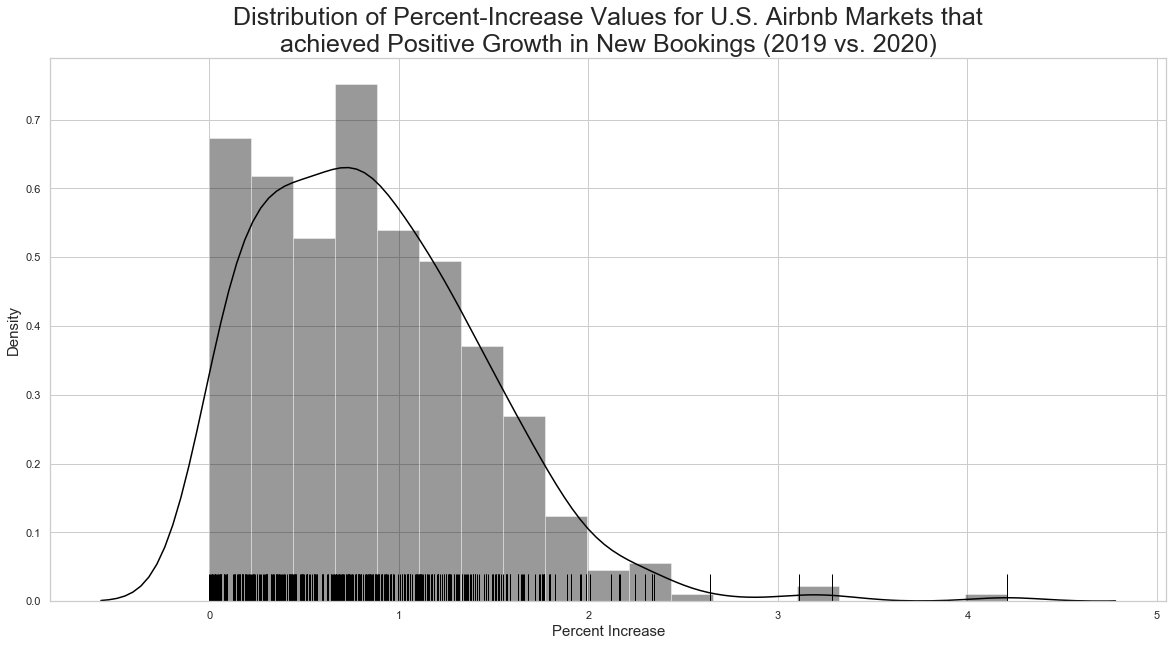

In [35]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid") 

YoY_density = sns.distplot(Pos_Growth["YoY % Change"], kde=True, rug=True, color="black")

YoY_density.set_ylabel("Density", fontsize=15)
YoY_density.set_xlabel("Percent Increase", fontsize=15)
YoY_density.set_title("\n".join(wrap("Distribution of Percent-Increase Values for U.S. Airbnb Markets that achieved Positive Growth in New Bookings (2019 vs. 2020)")), 
               fontsize=25);

In [36]:
Sorted_byPercent = Pos_Growth.sort_values(by="YoY % Change", ascending=False)
Sorted_byPercent.quantile(0.90)

2019                     5319.900000
2020                     8501.500000
YoY Raw Growth Volume    3055.200000
YoY % Change                1.623859
Name: 0.9, dtype: float64

In [37]:
Top10_PercentGrowth = Sorted_byPercent[
    Sorted_byPercent["YoY % Change"]>=Sorted_byPercent.quantile(0.90)["YoY % Change"]]

Top10_PercentGrowth

,,2019,2020,YoY Raw Growth Volume,YoY % Change
State,City,,,,
Maryland,Mc Henry,578,3011.0,2433.0,4.209343
North Carolina,Atlantic Beach,330,1414.0,1084.0,3.284848
Maryland,Oakland,727,2989.0,2262.0,3.111417
Texas,Spicewood,368,1341.0,973.0,2.644022
Oklahoma,Broken Bow,2358,7891.0,5533.0,2.346480
California,Yosemite National Pa,938,3130.0,2192.0,2.336887
New Mexico,Red River,589,1964.0,1375.0,2.334465
Montana,Red Lodge,385,1270.0,885.0,2.298701
Maryland,Swanton,345,1120.0,775.0,2.246377


In the scatterplot below, the **red** points represent the Airbnb market locations that underwent the top 10% `YoY % Change` from 2019 to 2020. However, because these Airbnb markets achieved over 150% growth from 2019 to 2020, we would say that they experienced "unsustainable" year-on-year growth in terms of increased number of bookings. That is, these locations were not particularly popular in 2019 before COVID-19 (which we can consider a "normal time" for the travel and hospitality industries), but relatively are extremely popular during COVID-19 in 2020. Therefore these are not suitable markets for SpacePlace's product launch because if and when COVID-19 subsides, these locations may not be booked as frequently anymore.

In fact, the average number of `2019` bookings for the locations in `Top10_PercentGrowth` is approximately 51.62% less than the average number of `2019` bookings for all locations in `Pos_Growth` (see below).

Remarkably, the markets in `Top10_Percent Growth`, again shown in red, align in an almost-linear pattern within the following scatterplot visualization, running along the top edge of all the points.

In [38]:
np.mean(Top10_PercentGrowth["2019"]), np.mean(Pos_Growth["2019"]), 1-np.mean(Top10_PercentGrowth["2019"])/np.mean(Pos_Growth["2019"])

(1043.8536585365853, 2157.410447761194, 0.5161543508701268)

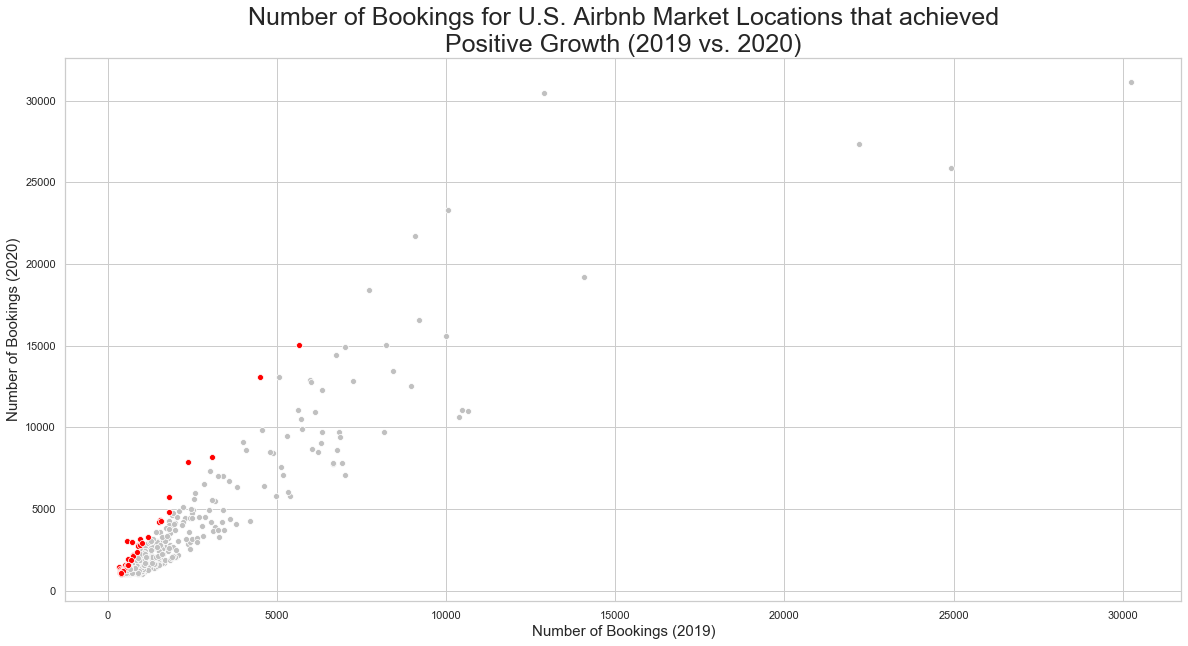

In [39]:
plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(x=Pos_Growth["2019"], y=Pos_Growth["2020"], color="silver");
Top10_PercentScatter = sns.scatterplot(x=Top10_PercentGrowth["2019"], y=Top10_PercentGrowth["2020"], color="red");

YoY_scatter.set_ylabel("Number of Bookings (2020)", fontsize=15)
YoY_scatter.set_xlabel("Number of Bookings (2019)", fontsize=15)
YoY_scatter.set_title("\n".join(wrap("Number of Bookings for U.S. Airbnb Market Locations that achieved Positive Growth (2019 vs. 2020)")), 
               fontsize=25);

The **red** points in the new scatterplot below represent the Airbnb market locations that underwent the bottom 10% `YoY % Change` from 2019 to 2020. These markets are those that experienced the smallest or most marginal growth in `YoY % Change` from 2019 to 2020. That is, they were neither particularly or notably popular before COVID-19 in 2019, nor during COVID-19 in 2020, and thus are not suitable target markets for SpacePlace's product launch.

Similarly, the markets in `Bottom10_Percent Growth`, again shown in red, align in an almost-linear pattern within the following scatterplot visualization, this time along the bottom edge of all the points.

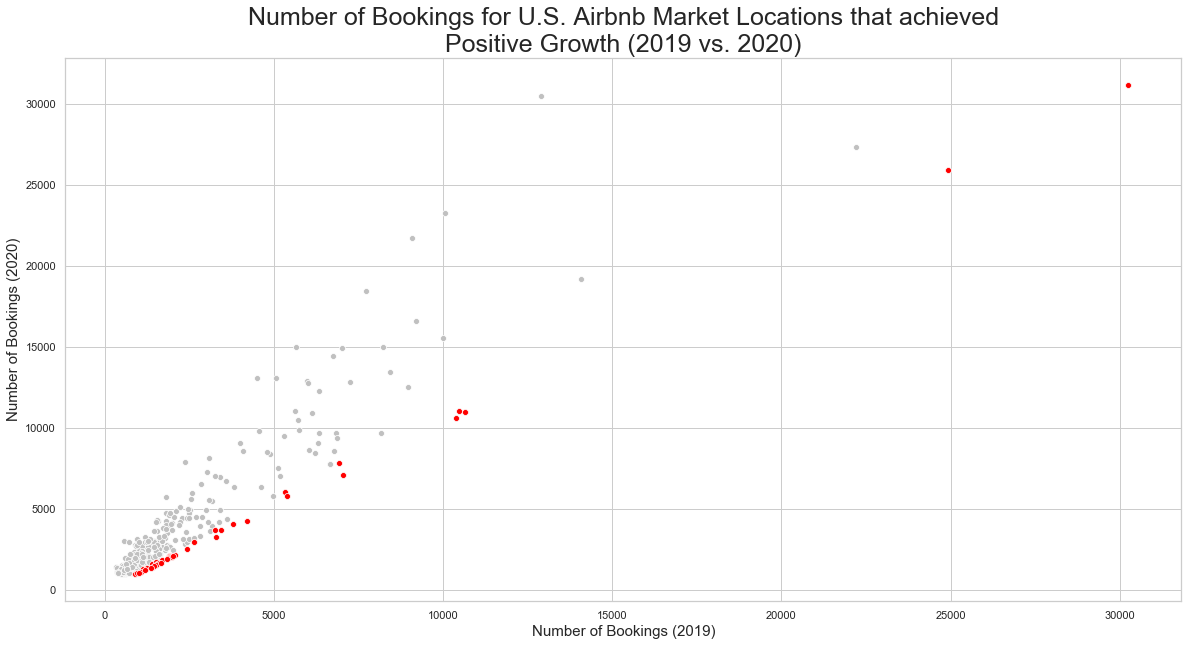

In [40]:
Bottom10_PercentGrowth = Sorted_byPercent[
    Sorted_byPercent["YoY % Change"]<=Sorted_byPercent.quantile(0.10)["YoY % Change"]]

plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(x=Pos_Growth["2019"], y=Pos_Growth["2020"], color="silver");
Bottom10_PercentScatter = sns.scatterplot(x=Bottom10_PercentGrowth["2019"], y=Bottom10_PercentGrowth["2020"], color="red");

YoY_scatter.set_ylabel("Number of Bookings (2020)", fontsize=15)
YoY_scatter.set_xlabel("Number of Bookings (2019)", fontsize=15)
YoY_scatter.set_title("\n".join(wrap("Number of Bookings for U.S. Airbnb Market Locations that achieved Positive Growth (2019 vs. 2020)")), 
               fontsize=25);

After visualizing how `Top10_PercentGrowth` and `Bottom10_PercentGrowth` fit within the overall scatterplot of `Pos_Growth["2019"]` versus `Pos_Growth["2020"]`, consider the following method: what if we took the Airbnb market locations that experienced the "Middle 10%" growth in terms of `YoY % Change`? These markets would be those that saw a significant increase in number of bookings from 2019 to 2020, but were still substantially popular in 2019. 

Such locations would therefore be desirable for SpacePlace's product launch: these markets hold increased opportunity due to COVID-19's effects in shifting domestic travel trends and behaviors, but even before COVID-19, they were still considerably popular.

In [41]:
# 45th percentile (Lower bound on the Middle 10%)

Sorted_byPercent.quantile(0.45)

2019                     1056.350000
2020                     1753.450000
YoY Raw Growth Volume     720.450000
YoY % Change                0.723716
Name: 0.45, dtype: float64

In [42]:
# 55th percentile (Upper Bound on the Middle 10%)

Sorted_byPercent.quantile(0.55)

2019                     1300.350
2020                     2087.600
YoY Raw Growth Volume     880.650
YoY % Change                0.858
Name: 0.55, dtype: float64

In [43]:
Middle10_PercentGrowth = Sorted_byPercent[
    (Sorted_byPercent["YoY % Change"]>=Sorted_byPercent.quantile(0.45)["YoY % Change"]) &
(Sorted_byPercent["YoY % Change"]<=Sorted_byPercent.quantile(0.55)["YoY % Change"])]

Middle10_PercentGrowth

2019     2020  YoY Raw Growth Volume  \
State          City                                                       
Mississippi    Biloxi               631   1171.0                  540.0   
Wisconsin      Wisconsin Dells     1449   2680.0                 1231.0   
Texas          Terlingua            564   1042.0                  478.0   
               College Station      696   1285.0                  589.0   
California     Palm Springs        5703  10517.0                 4814.0   
               Cambria              869   1600.0                  731.0   
Arizona        Gilbert              686   1260.0                  574.0   
Georgia        Tybee Island        2420   4442.0                 2022.0   
Florida        Ormond Beach         667   1221.0                  554.0   
Washington     Leavenworth         2191   4009.0                 1818.0   
South Carolina Hilton Head Island  8230  15019.0                 6789.0   
Arkansas       Rogers               570   1039.0                  469.0   
Utah           Washington          1140   2062.0                  922.0   
               Moab                3085   5561.0                 2476.0   
Florida        Saint Petersburg    9206  16583.0                 7377.0   
Nevada         Incline Village     1553   2794.0                 1241.0   
Colorado       Avon                1781   3196.0                 1415.0   
Florida        Clearwater          1176   2108.0                  932.0   
Colorado       Durango             1702   3047.0                 1345.0   
Texas          Corpus Christi      5301   9486.0                 4185.0   
New Mexico     Ruidoso             2488   4449.0                 1961.0   
Illinois       Galena               912   1626.0                  714.0   
Georgia        Savannah            6136  10939.0                 4803.0   
Michigan       Holland              592   1052.0                  460.0   
Missouri       Branson             4793   8506.0                 3713.0   
California     Shaver Lake          564   1000.0                  436.0   
Florida        Miramar Beach       7249  12842.0                 5593.0   
North Carolina Corolla              998   1753.0                  755.0   
Georgia        Blairsville          584   1024.0                  440.0   
Puerto Rico    Luquillo             873   1529.0                  656.0   
Georgia        Sautee Nacoochee     673   1178.0                  505.0   
Oregon         Rockaway Beach      1164   2027.0                  863.0   
Colorado       Aspen                809   1407.0                  598.0   
Puerto Rico    Cabo Rojo            641   1114.0                  473.0   
Wyoming        Cody                 802   1393.0                  591.0   
California     Laguna Beach         638   1107.0                  469.0   
Florida        Naples              3171   5496.0                 2325.0   
Michigan       South Haven          937   1624.0                  687.0   
Colorado       Pagosa Springs      1577   2730.0                 1153.0   
Florida        Largo                604   1042.0                  438.0   

                                   YoY % Change  
State          City                              
Mississippi    Biloxi                  0.855784  
Wisconsin      Wisconsin Dells         0.849551  
Texas          Terlingua               0.847518  
               College Station         0.846264  
California     Palm Springs            0.844117  
               Cambria                 0.841197  
Arizona        Gilbert                 0.836735  
Georgia        Tybee Island            0.835537  
Florida        Ormond Beach            0.830585  
Washington     Leavenworth             0.829758  
South Carolina Hilton Head Island      0.824909  
Arkansas       Rogers                  0.822807  
Utah           Washington              0.808772  
               Moab                    0.802593  
Florida        Saint Petersburg        0.801325  
Nevada         Incline Village    

Similar as before, the **red** points in the scatterplot below represent the Airbnb market locations that experienced the middle 10% positive growth in number of bookings from 2019 to 2020. These could alternatively be considered as the Airbnb markets with the "median" range of `YoY % Change` growth rates. 

Reassuringly, this special subset of points from `Pos_Growth` once again forms a remarkably near-perfect linear shape, which might present a later opportunity to create a linear regression model for Airbnb market locations with comparable booking data. For these points marked in red, the strong linear relationship between their number of bookings in 2019 and their number of bookings in 2020 is reinforced by a Pearson's correlation coefficient of approximately 0.9998. For all the points in `Pos_Growth`, the linear relationship is still quite strong, with a Pearson's correlation coefficient of approximately 0.9204.

Recall that `Pos_Growth` only includes Airbnb market locations that underwent positive growth in number of bookings from 2019 to 2020, excluding those that underwent negative growth.

In [46]:
r, p = st.pearsonr(x=Pos_Growth["2019"], y=Pos_Growth["2020"])
r, p

(0.9204588593122901, 2.7277480633802613e-165)

In [47]:
r, p = st.pearsonr(x=Middle10_PercentGrowth["2019"], y=Middle10_PercentGrowth["2020"])
r, p

(0.9997954569293346, 5.40645283447185e-66)

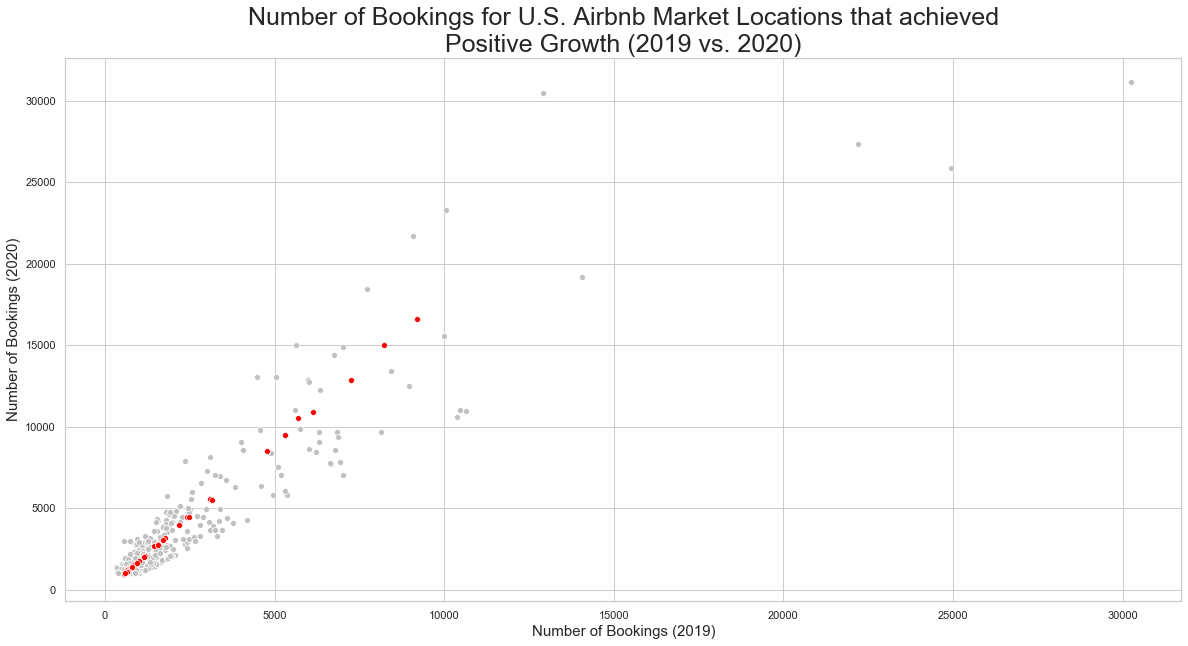

In [48]:
plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(x=Pos_Growth["2019"], y=Pos_Growth["2020"], color="silver");
Middle10_PercentScatter = sns.scatterplot(x=Middle10_PercentGrowth["2019"], y=Middle10_PercentGrowth["2020"], color="red");

YoY_scatter.set_ylabel("Number of Bookings (2020)", fontsize=15)
YoY_scatter.set_xlabel("Number of Bookings (2019)", fontsize=15)
YoY_scatter.set_title("\n".join(wrap("Number of Bookings for U.S. Airbnb Market Locations that achieved Positive Growth (2019 vs. 2020)")), 
               fontsize=25);

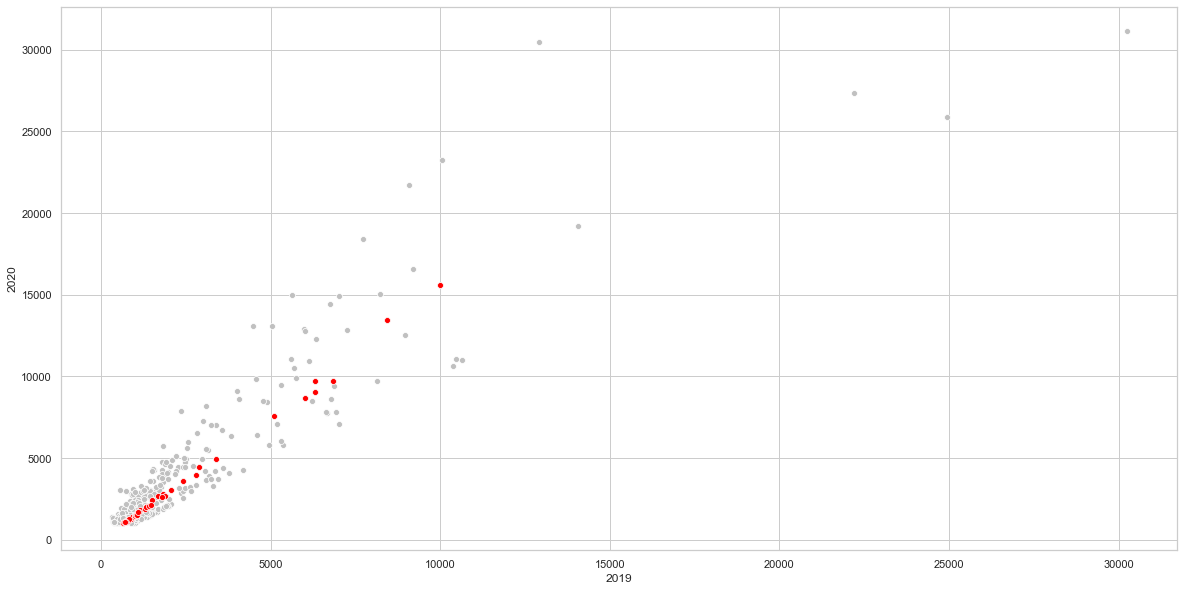

In [49]:
Sample = Pos_Growth.loc[Pos_Growth["YoY % Change"]>=.4].loc[Pos_Growth["YoY % Change"]<=.6]

plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(x=Pos_Growth["2019"], y=Pos_Growth["2020"], color="silver");
SampleScatter = sns.scatterplot(x=Sample["2019"], y=Sample["2020"], color="red");

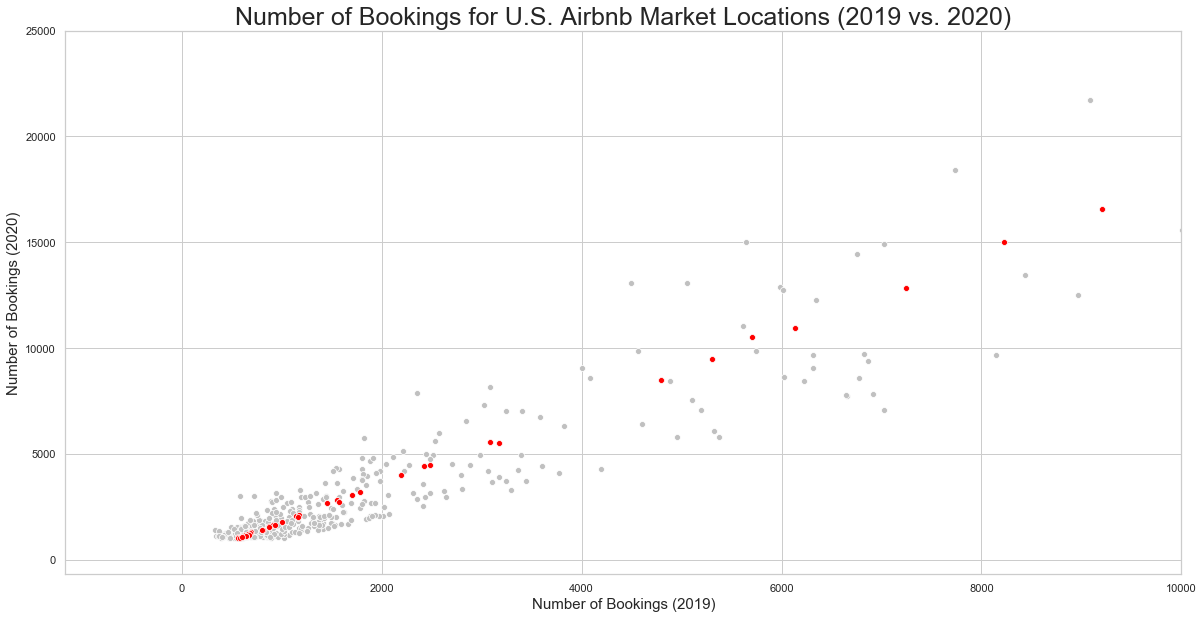

In [50]:
plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(x=Pos_Growth["2019"], y=Pos_Growth["2020"], color="silver");
Middle10_PercentScatter = sns.scatterplot(x=Middle10_PercentGrowth["2019"], y=Middle10_PercentGrowth["2020"], color="red");

YoY_scatter.set_ylabel("Number of Bookings (2020)", fontsize=15)
YoY_scatter.set_xlabel("Number of Bookings (2019)", fontsize=15)
YoY_scatter.set_title("Number of Bookings for U.S. Airbnb Market Locations (2019 vs. 2020)", fontsize=25);

plt.xlim(right=10000)
plt.ylim(top=25000);

Also remarkably, for this subset of points marked in red in the scatterplot above, the distribution of their `YoY % Change` values is nearly perfectly symmetric, as illustrated by the box plot below.

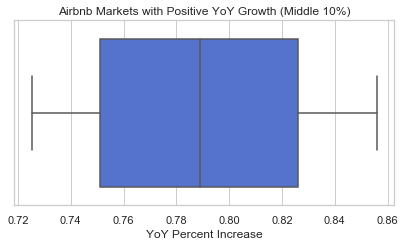

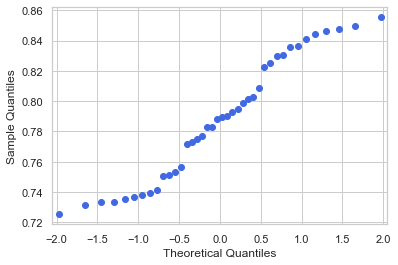

In [51]:
plt.figure(figsize=(6.8,3.4))

Middle10_YoYboxplot = sns.boxplot(x=Middle10_PercentGrowth["YoY % Change"], color="royalblue");
Middle10_YoYboxplot.set_xlabel("YoY Percent Increase")
Middle10_YoYboxplot.set_title("Airbnb Markets with Positive YoY Growth (Middle 10%)")

sm.qqplot(Middle10_PercentGrowth["YoY % Change"], color="royalblue") 
py.show();

<a id='section4.2'></a>
### Considering `YoY Raw Growth Volume`
Evaluating `YoY % Change`, however, is not sufficient enough in the search to pinpoint SpacePlace's ten key markets to target for product launch. Evaluating `YoY Raw Growth Volume` alongside `YoY % Change` is also important in order to identify which Airbnb market locations receive large enough volumes and influxes of Airbnb guests and visitors for SpacePlace to capitalize upon.

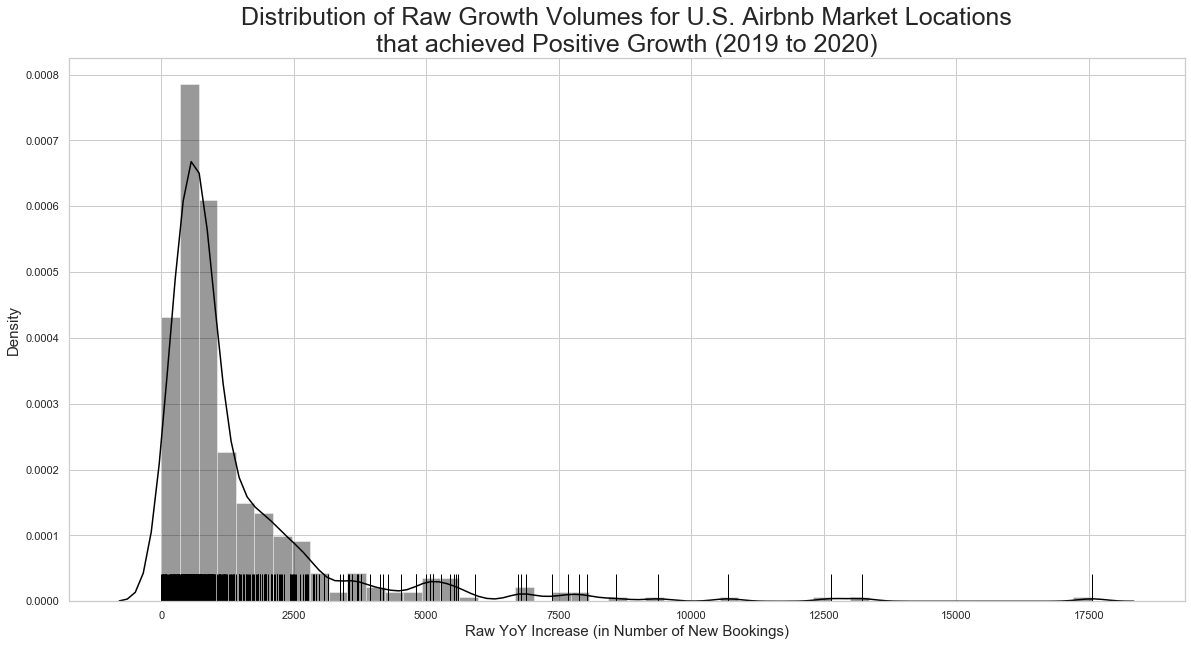

In [52]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid") 

YoY_density = sns.distplot(Pos_Growth["YoY Raw Growth Volume"], kde=True, rug=True, color="black")
YoY_density.set_ylabel("Density", fontsize=15)
YoY_density.set_xlabel("Raw YoY Increase (in Number of New Bookings)", fontsize=15)
YoY_density.set_title("\n".join(wrap("Distribution of Raw Growth Volumes for U.S. Airbnb Market Locations that achieved Positive Growth (2019 to 2020)")), 
               fontsize=25);

Similar to our analysis of `YoY % Change`, let's begin our investigation of `YoY Raw Growth Volume` by segmenting the Airbnb market locations that experienced the top 10% growth in terms of the raw number of additional bookings they received from 2019 to 2020.

In [53]:
Sorted_byRawGrowth = Pos_Growth.sort_values(by="YoY Raw Growth Volume", ascending=False)
Sorted_byRawGrowth.quantile(0.90)

2019                     5319.900000
2020                     8501.500000
YoY Raw Growth Volume    3055.200000
YoY % Change                1.623859
Name: 0.9, dtype: float64

We want to consider `YoY Raw Growth Volume` alongside `YoY % Change` in our market segmentation. However, upon inspection of the `YoY % Change` column in the dataframe below, there seems to be a very weak correlation or relationship between the two metrics, if any. This conjecture is confirmed by the following scatterplot and correlation coefficients, which follow in our previous method of taking the "Middle 10%" of Raw Growth Volumes as a smaller subset of our `Pos_Growth` data.

Again, recall that `Pos_Growth` only includes Airbnb market locations that underwent positive growth in number of bookings from 2019 to 2020 and excludes those that underwent negative growth.

In [54]:
Top10_RawGrowth = Sorted_byRawGrowth[
    Sorted_byRawGrowth["YoY Raw Growth Volume"]>=Sorted_byRawGrowth.quantile(0.90)["YoY Raw Growth Volume"]]

Top10_RawGrowth.head(20)

2019     2020  YoY Raw Growth Volume  \
State          City                                                        
Florida        Panama City Beach   12902  30461.0                17559.0   
South Carolina Myrtle Beach        10061  23277.0                13216.0   
Tennessee      Sevierville          9090  21726.0                12636.0   
Texas          Galveston            7733  18425.0                10692.0   
California     Big Bear Lake        5640  15010.0                 9370.0   
Texas          Port Aransas         4492  13074.0                 8582.0   
               South Padre Island   5057  13081.0                 8024.0   
Florida        Saint Augustine      7022  14900.0                 7878.0   
               Destin               6751  14435.0                 7684.0   
               Saint Petersburg     9206  16583.0                 7377.0   
Arizona        Scottsdale           5988  12869.0                 6881.0   
South Carolina Hilton Head Island   8230  15019.0                 6789.0   
Tennessee      Gatlinburg           6016  12747.0                 6731.0   
Florida        Sarasota             6344  12261.0                 5917.0   
               Miramar Beach        7249  12842.0                 5593.0   
Alabama        Gulf Shores         10003  15570.0                 5567.0   
Oklahoma       Broken Bow           2358   7891.0                 5533.0   
Florida        Santa Rosa Beach     5617  11058.0                 5441.0   
Maryland       Ocean City           4566   9836.0                 5270.0   
Florida        Miami               22202  27337.0                 5135.0   

                                   YoY % Change  
State          City                              
Florida        Panama City Beach       1.360952  
South Carolina Myrtle Beach            1.313587  
Tennessee      Sevierville             1.390099  
Texas          Galveston               1.382646  
California     Big Bear Lake           1.661348  
Texas          Port Aransas            1.910508  
               South Padre Island      1.586711  
Florida        Saint Augustine         1.121903  
               Destin                  1.138202  
               Saint Petersburg        0.801325  
Arizona        Scottsdale              1.149132  
South Carolina Hilton Head Island      0.824909  
Tennessee      Gatlinburg              1.118850  
Florida        Sarasota                0.932692  
               Miramar Beach           0.771555  
Alabama        Gulf Shores             0.556533  
Oklahoma       Broken Bow              2.346480  
Florida        Santa Rosa Beach        0.968667  
Maryland       Ocean City              1.154183  
Florida        Miami                   0.231285

In [56]:
r, p = st.pearsonr(x=Pos_Growth["YoY Raw Growth Volume"], y=Pos_Growth["YoY % Change"])
r, p

(0.2993311808007283, 9.133911895840916e-10)

In [58]:
Middle10_RawGrowth = Sorted_byRawGrowth[
    (Sorted_byRawGrowth["YoY Raw Growth Volume"]>=Sorted_byRawGrowth.quantile(0.45)["YoY Raw Growth Volume"]) &
(Sorted_byRawGrowth["YoY Raw Growth Volume"]<=Sorted_byRawGrowth.quantile(0.55)["YoY Raw Growth Volume"])]

r, p = st.pearsonr(x=Middle10_RawGrowth["YoY Raw Growth Volume"], y=Middle10_RawGrowth["YoY % Change"])
r, p

(-0.08326291134808617, 0.6094975322011502)

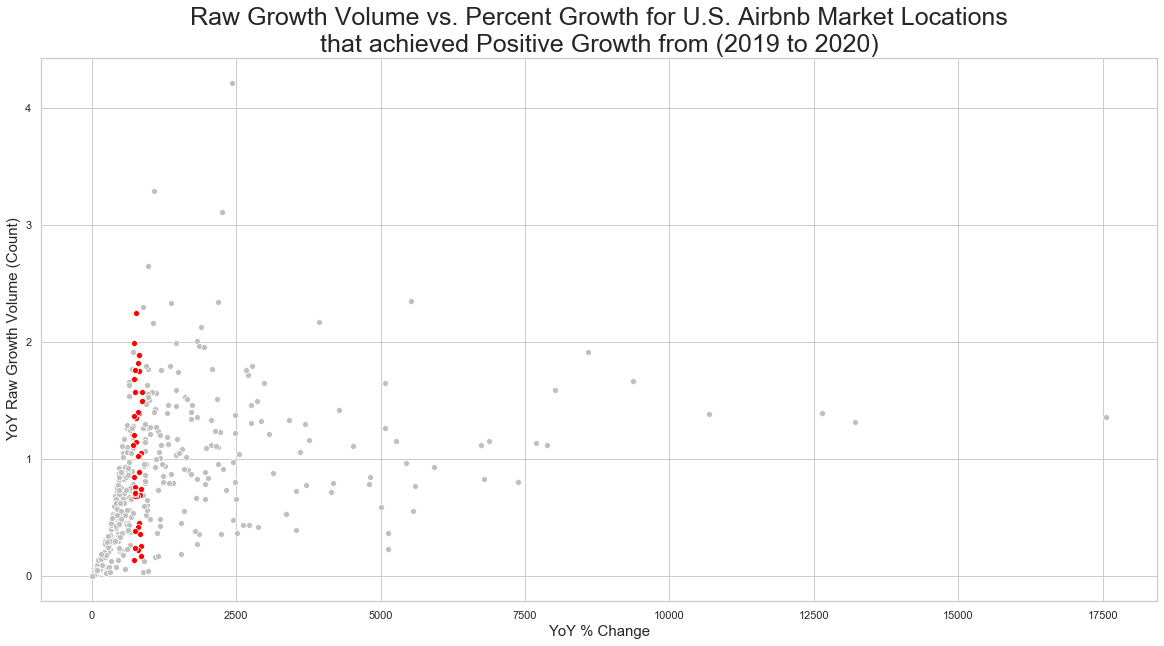

In [59]:
plt.figure(figsize=(20,10))

RawGrowth_scatter = sns.scatterplot(x=Pos_Growth["YoY Raw Growth Volume"], y=Pos_Growth["YoY % Change"], color="silver");
Middle10_RawGrowthScatter = sns.scatterplot(x=Middle10_RawGrowth["YoY Raw Growth Volume"], y=Middle10_RawGrowth["YoY % Change"], color="red");

RawGrowth_scatter.set_ylabel("YoY Raw Growth Volume (Count)", fontsize=15)
RawGrowth_scatter.set_xlabel("YoY % Change", fontsize=15)
RawGrowth_scatter.set_title("\n".join(wrap("Raw Growth Volume vs. Percent Growth for U.S. Airbnb Market Locations that achieved Positive Growth from (2019 to 2020)")), 
                            fontsize=25);

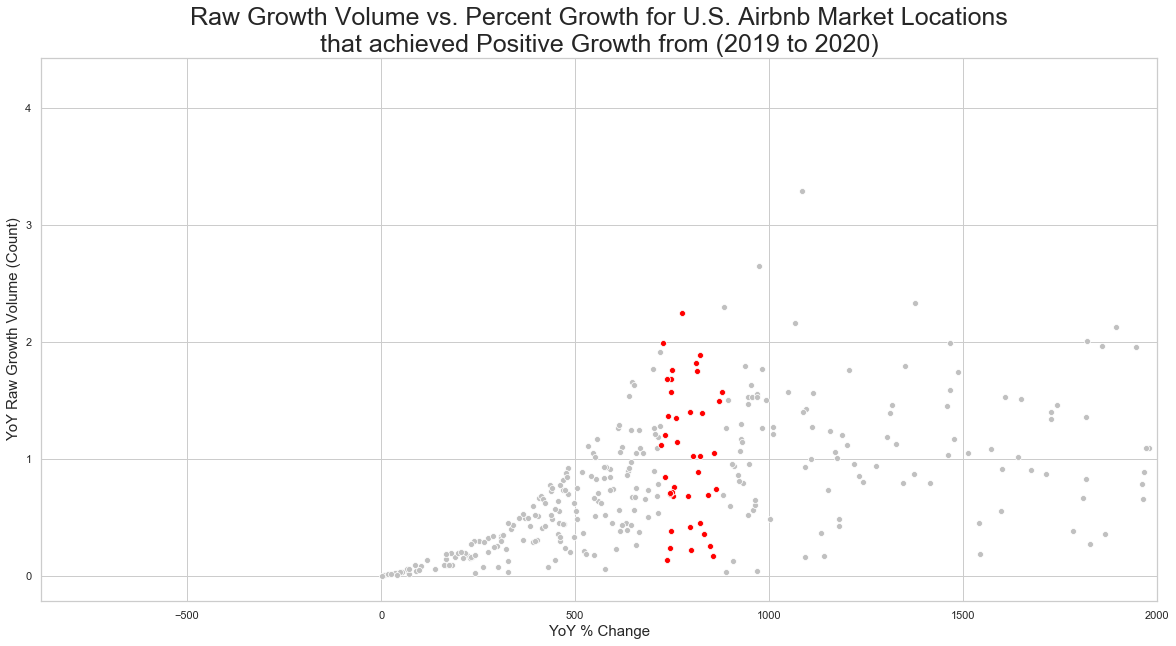

In [60]:
plt.figure(figsize=(20,10))

RawGrowth_scatter = sns.scatterplot(x=Pos_Growth["YoY Raw Growth Volume"], y=Pos_Growth["YoY % Change"], color="silver");
Middle10_RawGrowthScatter = sns.scatterplot(x=Middle10_RawGrowth["YoY Raw Growth Volume"], y=Middle10_RawGrowth["YoY % Change"], color="red");

RawGrowth_scatter.set_ylabel("YoY Raw Growth Volume (Count)", fontsize=15)
RawGrowth_scatter.set_xlabel("YoY % Change", fontsize=15)
RawGrowth_scatter.set_title("\n".join(wrap("Raw Growth Volume vs. Percent Growth for U.S. Airbnb Market Locations that achieved Positive Growth from (2019 to 2020)")), 
                            fontsize=25);

plt.xlim(right=2000);

<a id='section4.3'></a>
# Ten Target Markets for SpacePlace Product Launch

In order to consider `YoY Raw Growth Volume` alongside `YoY % Change` in an appropriate fashion, let's extract the locations in `Sorted_byRawGrowth` whose values for `YoY % Change` fall within the same range as the `YoY % Change` values in the `Middle10_PercentGrowth` dataframe.

For reference, recall that `Middle10_PercentGrowth` is the subset of data that contains Airbnb market locations that experienced "median-level" growth in terms of `YoY % Change`.

In [62]:
Target_RawGrowth = Sorted_byRawGrowth.loc[Sorted_byRawGrowth["YoY % Change"]<max(Middle10_PercentGrowth["YoY % Change"])]
Target_SPmarkets = Target_RawGrowth.loc[Target_RawGrowth["YoY % Change"]>min(Middle10_PercentGrowth["YoY % Change"])]
Target_SPmarkets

,,2019,2020,YoY Raw Growth Volume,YoY % Change
State,City,,,,
Florida,Saint Petersburg,9206,16583.0,7377.0,0.801325
South Carolina,Hilton Head Island,8230,15019.0,6789.0,0.824909
Florida,Miramar Beach,7249,12842.0,5593.0,0.771555
California,Palm Springs,5703,10517.0,4814.0,0.844117
Georgia,Savannah,6136,10939.0,4803.0,0.782757
Texas,Corpus Christi,5301,9486.0,4185.0,0.789474
Missouri,Branson,4793,8506.0,3713.0,0.774671
Utah,Moab,3085,5561.0,2476.0,0.802593
Florida,Naples,3171,5496.0,2325.0,0.733207


To narrow down the list of Airbnb market locations above—and to isolate markets with the largest volume and influx of Airbnb guests—let's set 100 as an arbitrary cut-off point for `YoY Raw Growth Volume`. In other words, we will only consider Airbnb market locations whose year-on-year raw growth from 2019 to 2020 is at least 1000.

In [65]:
Target_SPmarkets = Target_SPmarkets.loc[Target_SPmarkets["YoY Raw Growth Volume"]>=1000]
Target_SPmarkets

,,2019,2020,YoY Raw Growth Volume,YoY % Change
State,City,,,,
Florida,Saint Petersburg,9206,16583.0,7377.0,0.801325
South Carolina,Hilton Head Island,8230,15019.0,6789.0,0.824909
Florida,Miramar Beach,7249,12842.0,5593.0,0.771555
California,Palm Springs,5703,10517.0,4814.0,0.844117
Georgia,Savannah,6136,10939.0,4803.0,0.782757
Texas,Corpus Christi,5301,9486.0,4185.0,0.789474
Missouri,Branson,4793,8506.0,3713.0,0.774671
Utah,Moab,3085,5561.0,2476.0,0.802593
Florida,Naples,3171,5496.0,2325.0,0.733207


The dataframe above contains 17 locations, and we want to identify 10 for SpacePlace's product launch. To help narrow down this list even further, we will consider two additional metrics: 2020 measurements for `Population` and `Population per square mile`. Values for both of these metrics were obtained from [World Population Review](https://worldpopulationreview.com/) and cross-checked with the Quick Facts page from the [United States Census Bureau](https://www.census.gov/quickfacts) for reasonable accuracy. 

Additionally, we will consider each location's distance, in miles, from its nearest city or metropolitan area. Values for this metric were obtained by searching on Google Maps for the shortest driving distance (in duration) between each of the 17 locations above and their nearest respective cities or metropolitan areas.

When evaluating these 17 locations, our criteria for determining SpacePlace's 10 key target markets are:
1. Proximity outside a major city or metropolitan area.
2. Amount of physical space, i.e. the ability to go outside and encounter as few people as possible (quantified by population density).

In [66]:
# Population estimate
Pops = np.array([271842, 39721, 8758, 49291, 145754, 325406, 11765, 5268, 22367, 3134, 7968, 2032, 6442, 19097, 
                8491, 3341, 2147])

# Population density: Population per square mile
Pops_dens = np.array([4394.2, 960.5, 1247.7, 521.4, 1402.7, 2037.6, 555.7, 1098.5, 1819.2, 1073.6, 495.6, 1446.6, 
                     787.2, 1299.7, 394.7, 426.2, 431.2])

# Nearest city or metropolitan area
Nearest_city = np.array(["Saint Petersburg, FL", "Savannah, GA", "Tallahassee, FL", "Los Angeles, CA", "Savannah, GA", 
                         "Corpus Christi, TX", "Springfield, MO", "Salt Lake City, UT", "Miami, FL", "Savannah, GA", 
                         "Albuquerque, NM", "Seattle, WA", "Denver, CO", "Colorado Springs, CO", "Reno, NV", 
                         "Milwaukee, WI", "Colorado Springs, CO"])

# Distance to nearest city or metropolitan area (in miles)
Dist_toCity = np.array([0, 31.5, 157.7, 106.6, 0, 0, 44.2, 233.5, 125.6, 17.6, 181.3, 117.2, 106.1, 314.1, 
                        36.1, 121.5, 254.1])

In [67]:
Target_SPmarkets = Target_SPmarkets.reset_index()
Target_SPmarkets["Population"] = Pops
Target_SPmarkets["Population per Square Mile"] = Pops_dens
Target_SPmarkets["Nearest City/Metro"] = Nearest_city
Target_SPmarkets["Distance to Nearest City/Metro (miles)"] = Dist_toCity
Target_SPmarkets = Target_SPmarkets.set_index(["State", "City"])
Target_SPmarkets

,,2019,2020,YoY Raw Growth Volume,YoY % Change,Population,Population per Square Mile,Nearest City/Metro,Distance to Nearest City/Metro (miles)
State,City,,,,,,,,
Florida,Saint Petersburg,9206,16583.0,7377.0,0.801325,271842,4394.2,"Saint Petersburg, FL",0.0
South Carolina,Hilton Head Island,8230,15019.0,6789.0,0.824909,39721,960.5,"Savannah, GA",31.5
Florida,Miramar Beach,7249,12842.0,5593.0,0.771555,8758,1247.7,"Tallahassee, FL",157.7
California,Palm Springs,5703,10517.0,4814.0,0.844117,49291,521.4,"Los Angeles, CA",106.6
Georgia,Savannah,6136,10939.0,4803.0,0.782757,145754,1402.7,"Savannah, GA",0.0
Texas,Corpus Christi,5301,9486.0,4185.0,0.789474,325406,2037.6,"Corpus Christi, TX",0.0
Missouri,Branson,4793,8506.0,3713.0,0.774671,11765,555.7,"Springfield, MO",44.2
Utah,Moab,3085,5561.0,2476.0,0.802593,5268,1098.5,"Salt Lake City, UT",233.5
Florida,Naples,3171,5496.0,2325.0,0.733207,22367,1819.2,"Miami, FL",125.6


Right away, we can eliminate **Saint Petersburg, Savannah, and Corpus Christi** from our list of candidates for SpacePlace's target markets because these locations are cities or metropolitan areas themselves. This narrows our list of prospective target markets from 17 to 14.

In [68]:
Target_SPmarkets = Target_SPmarkets.drop(index=["Saint Petersburg", "Savannah", "Corpus Christi"], level=1)
Target_SPmarkets

,,2019,2020,YoY Raw Growth Volume,YoY % Change,Population,Population per Square Mile,Nearest City/Metro,Distance to Nearest City/Metro (miles)
State,City,,,,,,,,
South Carolina,Hilton Head Island,8230,15019.0,6789.0,0.824909,39721,960.5,"Savannah, GA",31.5
Florida,Miramar Beach,7249,12842.0,5593.0,0.771555,8758,1247.7,"Tallahassee, FL",157.7
California,Palm Springs,5703,10517.0,4814.0,0.844117,49291,521.4,"Los Angeles, CA",106.6
Missouri,Branson,4793,8506.0,3713.0,0.774671,11765,555.7,"Springfield, MO",44.2
Utah,Moab,3085,5561.0,2476.0,0.802593,5268,1098.5,"Salt Lake City, UT",233.5
Florida,Naples,3171,5496.0,2325.0,0.733207,22367,1819.2,"Miami, FL",125.6
Georgia,Tybee Island,2420,4442.0,2022.0,0.835537,3134,1073.6,"Savannah, GA",17.6
New Mexico,Ruidoso,2488,4449.0,1961.0,0.788183,7968,495.6,"Albuquerque, NM",181.3
Washington,Leavenworth,2191,4009.0,1818.0,0.829758,2032,1446.6,"Seattle, WA",117.2


In [69]:
Target_SPmarkets.sort_values(by="Population per Square Mile", ascending=True)

,,2019,2020,YoY Raw Growth Volume,YoY % Change,Population,Population per Square Mile,Nearest City/Metro,Distance to Nearest City/Metro (miles)
State,City,,,,,,,,
Nevada,Incline Village,1553,2794.0,1241.0,0.799099,8491,394.7,"Reno, NV",36.1
Wisconsin,Wisconsin Dells,1449,2680.0,1231.0,0.849551,3341,426.2,"Milwaukee, WI",121.5
Colorado,Pagosa Springs,1577,2730.0,1153.0,0.731135,2147,431.2,"Colorado Springs, CO",254.1
New Mexico,Ruidoso,2488,4449.0,1961.0,0.788183,7968,495.6,"Albuquerque, NM",181.3
California,Palm Springs,5703,10517.0,4814.0,0.844117,49291,521.4,"Los Angeles, CA",106.6
Missouri,Branson,4793,8506.0,3713.0,0.774671,11765,555.7,"Springfield, MO",44.2
Colorado,Avon,1781,3196.0,1415.0,0.794497,6442,787.2,"Denver, CO",106.1
South Carolina,Hilton Head Island,8230,15019.0,6789.0,0.824909,39721,960.5,"Savannah, GA",31.5
Georgia,Tybee Island,2420,4442.0,2022.0,0.835537,3134,1073.6,"Savannah, GA",17.6


In [70]:
Target_SPmarkets.sort_values(by="Distance to Nearest City/Metro (miles)", ascending=True)

,,2019,2020,YoY Raw Growth Volume,YoY % Change,Population,Population per Square Mile,Nearest City/Metro,Distance to Nearest City/Metro (miles)
State,City,,,,,,,,
Georgia,Tybee Island,2420,4442.0,2022.0,0.835537,3134,1073.6,"Savannah, GA",17.6
South Carolina,Hilton Head Island,8230,15019.0,6789.0,0.824909,39721,960.5,"Savannah, GA",31.5
Nevada,Incline Village,1553,2794.0,1241.0,0.799099,8491,394.7,"Reno, NV",36.1
Missouri,Branson,4793,8506.0,3713.0,0.774671,11765,555.7,"Springfield, MO",44.2
Colorado,Avon,1781,3196.0,1415.0,0.794497,6442,787.2,"Denver, CO",106.1
California,Palm Springs,5703,10517.0,4814.0,0.844117,49291,521.4,"Los Angeles, CA",106.6
Washington,Leavenworth,2191,4009.0,1818.0,0.829758,2032,1446.6,"Seattle, WA",117.2
Wisconsin,Wisconsin Dells,1449,2680.0,1231.0,0.849551,3341,426.2,"Milwaukee, WI",121.5
Florida,Naples,3171,5496.0,2325.0,0.733207,22367,1819.2,"Miami, FL",125.6
